In [103]:
import numpy as np 
import pandas as pd 
from pathlib import Path
%matplotlib inline

In [104]:
yen_futures = pd.read_csv(
    Path("Resources/yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [105]:
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


In [106]:
yen_futures_df = pd.DataFrame(yen_futures["Settle"])
yen_futures_df
# type(yen_futures_settle_df)

,Settle
Date,
1990-01-02,6847.0
1990-01-03,6887.0
1990-01-04,7008.0
1990-01-05,6950.0
1990-01-08,6959.0
...,...
2019-10-09,9338.0
2019-10-10,9303.5
2019-10-11,9251.0


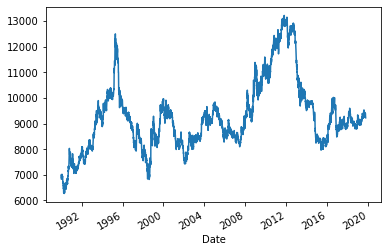

In [107]:
yen_futures.Settle.plot()

In [108]:
import statsmodels.api as sm 
yen_futures_noise, yen_futures_trend = sm.tsa.filters.hpfilter(yen_futures["Settle"])

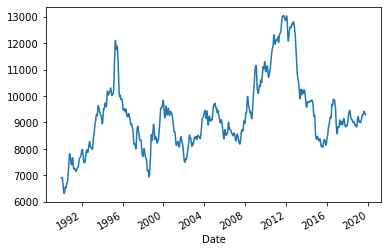

In [109]:
yen_futures_trend.plot()

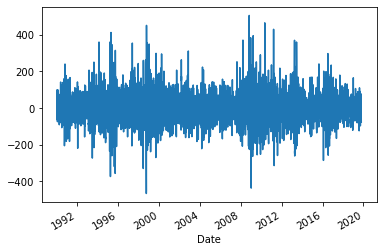

In [110]:
yen_futures_noise.plot()

In [111]:
yen_futures_noise_df = pd.DataFrame(yen_futures_noise)
yen_futures_noise_df.rename(columns = {'Settle_cycle':'Noise'}, inplace=True)
yen_futures_noise_df

,Noise
Date,
1990-01-02,-61.503967
1990-01-03,-21.799756
1990-01-04,98.942896
1990-01-05,40.776052
1990-01-08,49.689938
...,...
2019-10-09,24.939247
2019-10-10,-5.868559
2019-10-11,-54.454594


In [112]:
yen_futures_trend_df = pd.DataFrame(yen_futures_trend)
yen_futures_trend_df.rename(columns = {'Settle_trend':'Trend'}, inplace=True)
yen_futures_trend_df

,Trend
Date,
1990-01-02,6908.503967
1990-01-03,6908.799756
1990-01-04,6909.057104
1990-01-05,6909.223948
1990-01-08,6909.310062
...,...
2019-10-09,9313.060753
2019-10-10,9309.368559
2019-10-11,9305.454594


In [113]:
yen_df = pd.concat([yen_futures_df, yen_futures_trend_df, yen_futures_noise_df], axis="columns", join="inner")
yen_df

,Settle,Trend,Noise
Date,,,
1990-01-02,6847.0,6908.503967,-61.503967
1990-01-03,6887.0,6908.799756,-21.799756
1990-01-04,7008.0,6909.057104,98.942896
1990-01-05,6950.0,6909.223948,40.776052
1990-01-08,6959.0,6909.310062,49.689938
...,...,...,...
2019-10-09,9338.0,9313.060753,24.939247
2019-10-10,9303.5,9309.368559,-5.868559
2019-10-11,9251.0,9305.454594,-54.454594


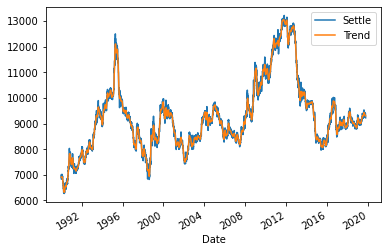

In [114]:
yen_df.drop(["Noise"], inplace=True, axis=1)
yen_df.plot()

In [115]:
yen_2015_pres = yen_df.loc["2015":]

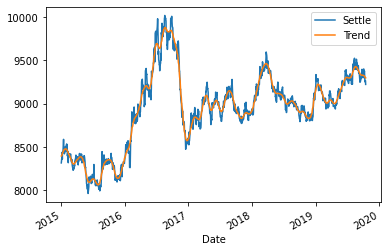

In [117]:
yen_2015_pres.plot()